# Does the variety of product offerings have an impact on alternative payment methods?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import plotly.express as px

pd.set_option('display.max_columns', None)

%matplotlib inline 

C:\Users\kekay\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('data/cleaned_market_df.csv')
drop_cols = ['street', 'city', 'County', 'zip', 'x', 'y']
df.drop(columns=drop_cols, axis=1, inplace=True)
df.head()

,MarketName,State,Credit,WIC,WICcash,SFMNP,SNAP,has_website,Produce,Confectionary,Household,Dairy,Plants,Meat,Other,product_count,alt_pay_methods
0,Caledonia Farmers Market Association - Danville,Vermont,1,1,0,1,0,1,5.0,4.0,3.0,2.0,2.0,2.0,2.0,20.0,2
1,Stearns Homestead Farmers' Market,Ohio,1,0,0,1,0,1,3.0,4.0,2.0,1.0,1.0,1.0,0.0,12.0,1
2,10th Steet Community Farmers Market,Missouri,1,0,0,0,0,0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,13.0,0
3,112st Madison Avenue,New York,0,0,1,1,0,0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,10.0,2
4,12 South Farmers Market,Tennessee,1,0,0,0,1,1,4.0,5.0,2.0,2.0,1.0,2.0,2.0,18.0,1


In [4]:
print('shape')
print(df.shape)
print('-' *40)
df.describe()

shape
(5864, 17)
----------------------------------------


,Credit,WIC,WICcash,SFMNP,SNAP,has_website,Produce,Confectionary,Household,Dairy,Plants,Meat,Other,product_count,alt_pay_methods
count,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.000000,5864.00000
mean,0.811050,0.453956,0.226808,0.467087,0.493179,0.718793,3.550819,3.105218,1.511767,1.289563,1.667633,1.274045,1.157742,13.556787,1.64103
std,0.391502,0.497918,0.418803,0.498958,0.499996,0.449627,1.629553,1.257017,0.990419,0.804677,1.068777,1.117260,0.971106,5.694645,1.40692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.000000,0.00000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,14.000000,1.00000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,18.000000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,5.000000,3.000000,3.000000,4.000000,3.000000,3.000000,28.000000,4.00000


In [5]:
df['alt_pay_methods'].value_counts()

0    1753
1    1242
3    1179
2     958
4     732
Name: alt_pay_methods, dtype: int64

# Visualization

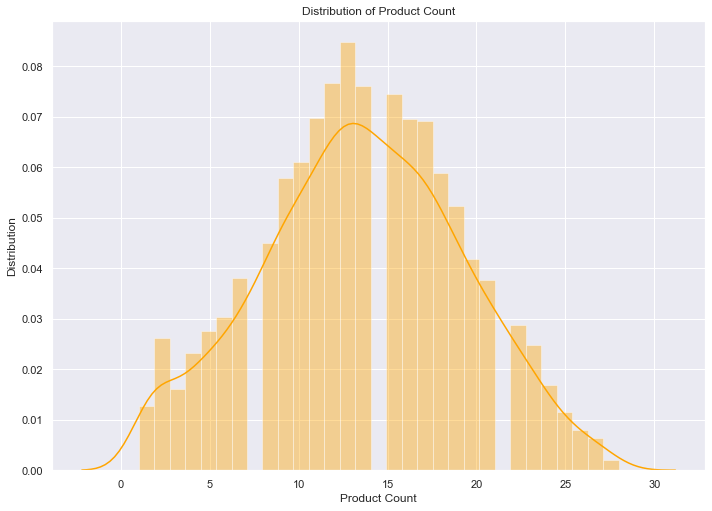

In [30]:
x = df['product_count']

sns.set_color_codes()
ax = sns.distplot(x, color="orange")
plt.title('Distribution of Product Count')
plt.ylabel('Distribution')
plt.xlabel('Product Count')
plt.show()

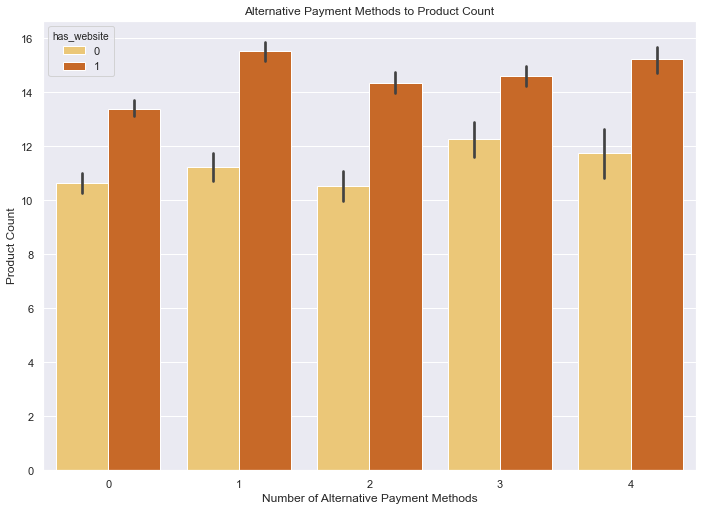

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="alt_pay_methods", y="product_count", hue="has_website", data=df, palette="YlOrBr")
plt.title('Alternative Payment Methods to Product Count')
plt.ylabel('Product Count')
plt.xlabel('Number of Alternative Payment Methods')
#plt.legend(labels=['Has Website'])
plt.show()

##### Seems that Markets with websites tend to have more variety; but that the amount of accepted payments doesn't have a high impact

In [75]:
df.columns

Index(['MarketName', 'State', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP',
       'has_website', 'Produce', 'Confectionary', 'Household', 'Dairy',
       'Plants', 'Meat', 'Other', 'product_count', 'alt_pay_methods'],
      dtype='object')

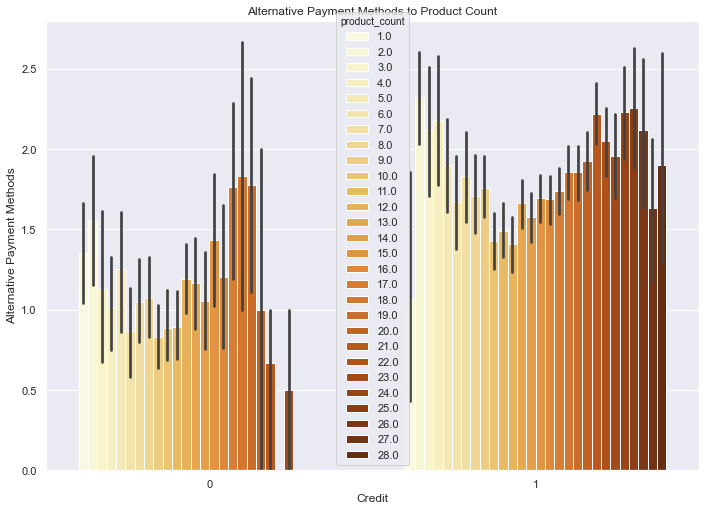

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Credit", y="alt_pay_methods", hue="product_count", data=df, palette="YlOrBr")
plt.title('Alternative Payment Methods to Product Count')
plt.ylabel('Alternative Payment Methods')
plt.xlabel('Credit')
plt.show()

In [43]:
state_list = ['Vermont', 'Ohio', 'Missouri', 'New York', 'Tennessee', 'Delaware',
       'District of Columbia', 'Oregon', 'Minnesota', 'Virginia',
       'Pennsylvania', 'Nebraska', 'Illinois', 'Florida', 'Washington',
       'Kansas', 'New Jersey', 'Utah', 'Maryland', 'Indiana', 'Nevada',
       'Alabama', 'Iowa', 'South Carolina', 'Wisconsin', 'Massachusetts',
       'Louisiana', 'New Mexico', 'Oklahoma', 'Michigan', 'Georgia',
       'North Carolina', 'Arizona', 'California', 'Texas', 'Colorado',
       'West Virginia', 'Idaho', 'Montana', 'North Dakota', 'Kentucky',
       'Rhode Island', 'Arkansas', 'Mississippi', 'Maine', 'Connecticut',
       'New Hampshire', 'Wyoming', 'South Dakota']